<a href="https://colab.research.google.com/github/Husayn01/Machine-Learning-Specialization/blob/main/Other%20Notebooks/Spaceship_Titanic_Logistic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [143]:
train_data = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Specialization/refs/heads/main/Other%20Notebooks/Data/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Specialization/refs/heads/main/Other%20Notebooks/Data/test.csv")

In [144]:
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

Train shape: (8693, 14)
Test shape: (4277, 13)


In [145]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [147]:
train_data.nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


In [148]:
train_data[train_data.select_dtypes(include="float64").columns].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [149]:
px.bar(x=train_data["Transported"].value_counts().index, y=train_data["Transported"].value_counts().values)

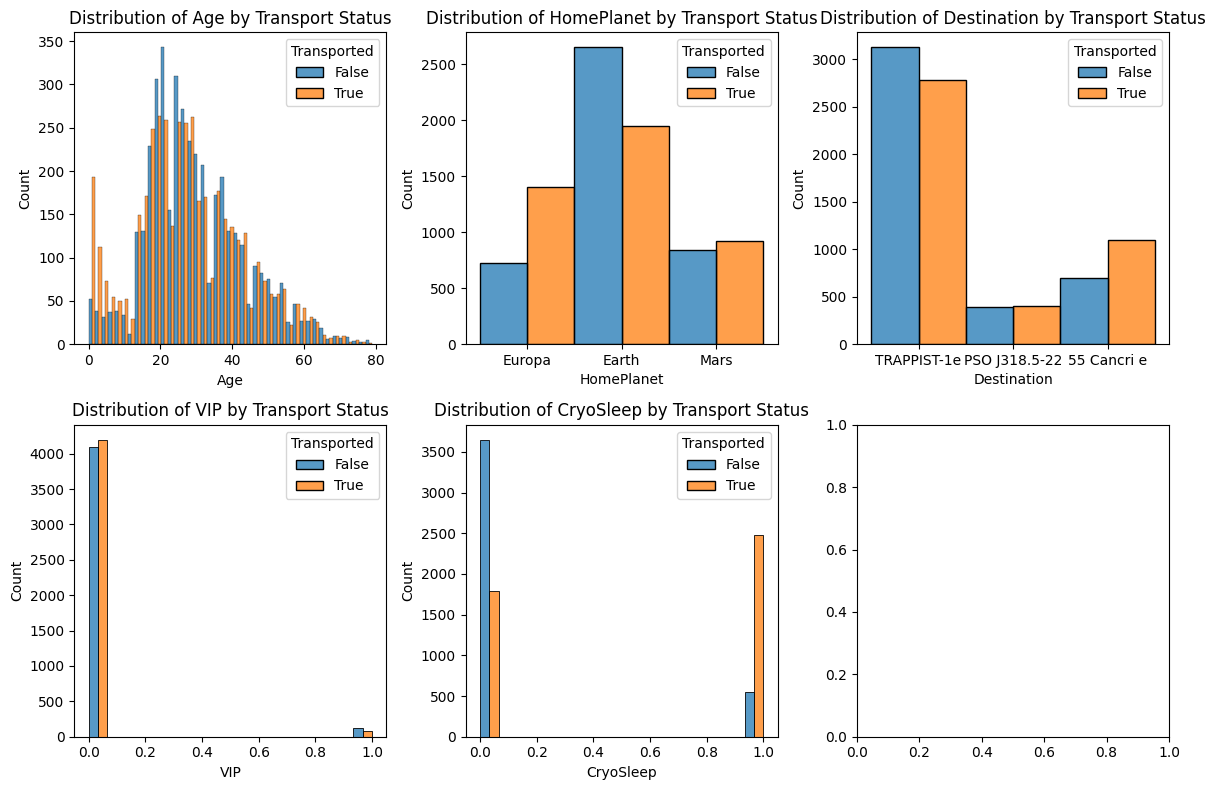

In [150]:
cols = ['Age', 'HomePlanet', 'Destination', 'VIP', 'CryoSleep']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=train_data, x=col, hue='Transported', multiple='dodge', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Transport Status')

plt.tight_layout()
plt.show()


In [151]:
def engineer_features(df):
  df_processed = df.copy()
  if "Cabin" in df_processed.columns:
     df_processed['CabinDeck'] = df_processed['Cabin'].str.split('/').str[0]
     df_processed['CabinNum'] = df_processed['Cabin'].str.split('/').str[1].astype('float')
     df_processed['CabinSide'] = df_processed['Cabin'].str.split('/').str[2]

  df_processed['GroupId'] = df_processed['PassengerId'].str.split('_').str[0]
  df_processed['PassengerNum'] = df_processed['PassengerId'].str.split('_').str[1].astype(int)
  group_sizes = df_processed.groupby('GroupId').size()
  df_processed['GroupSize'] = df_processed['GroupId'].map(group_sizes)

  # Create traveling alone indicator
  df_processed['TravelingAlone'] = (df_processed['GroupSize'] == 1).astype(int)

  return df_processed

In [152]:
train_processed = engineer_features(train_data)
test_processed = engineer_features(test_data)
train_processed.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,GroupId,PassengerNum,GroupSize,TravelingAlone
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,B,0.0,P,0001,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,F,0.0,S,0002,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,A,0.0,S,0003,1,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,A,0.0,S,0003,2,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,F,1.0,S,0004,1,1,1


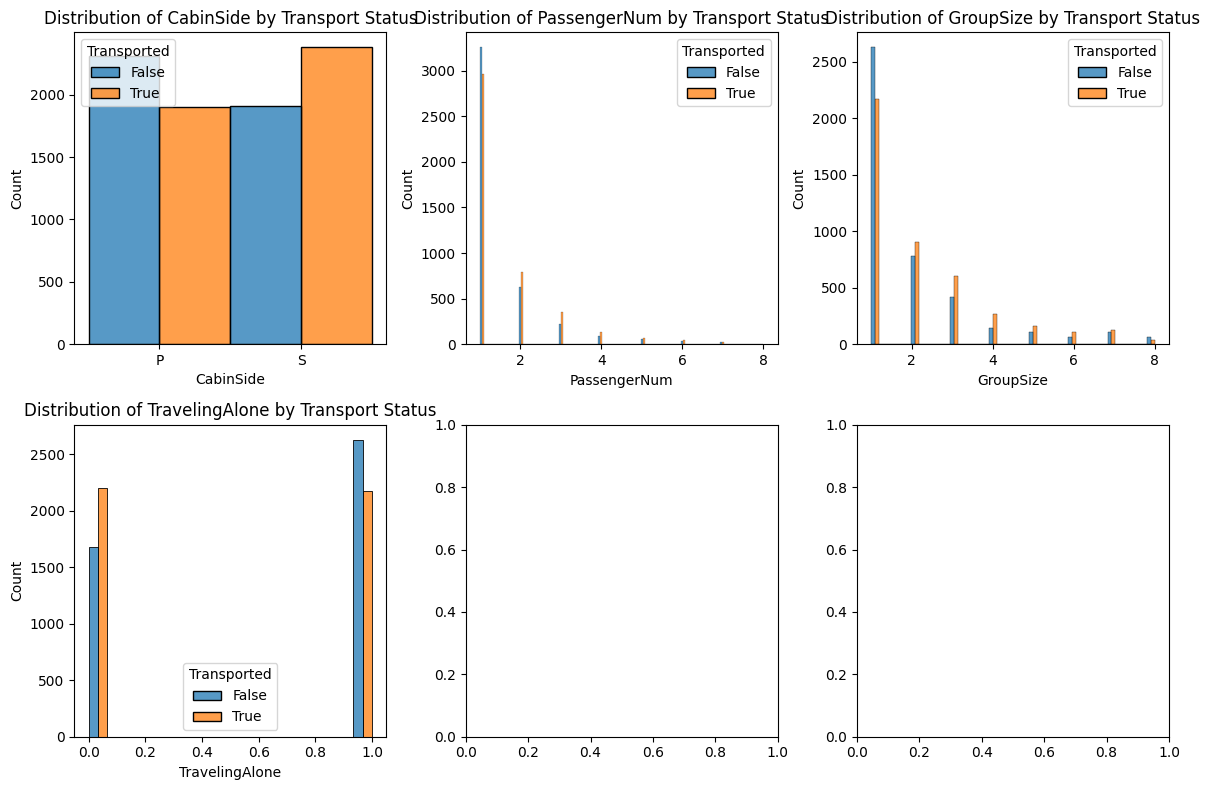

In [153]:
cols = ['CabinSide', 'PassengerNum', 'GroupSize', 'TravelingAlone',]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=train_processed, x=col, hue='Transported', multiple='dodge', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Transport Status')

plt.tight_layout()
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [155]:
identifier_cols = ['PassengerId', 'Name', 'Cabin', 'GroupId','Transported',]
target_col = 'Transported'
X = train_processed.drop(identifier_cols, axis=1)
y = train_processed[target_col]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
feature_cols = [col for col in train_processed.columns
                if col not in identifier_cols + [target_col]]


Training set shape: (6954, 16)
Validation set shape: (1739, 16)


In [156]:
X.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide,PassengerNum,GroupSize,TravelingAlone
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0.0,P,1,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0.0,S,1,1,1


In [157]:
numerical_cols = X[X.select_dtypes(include=['int64', 'float64']).columns].columns
categorical_cols = X[X.select_dtypes(include="object").columns].columns
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNum', 'PassengerNum', 'GroupSize', 'TravelingAlone'],
      dtype='object')
Categorical columns: Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide'],
      dtype='object')


In [158]:
X[numerical_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum,PassengerNum,GroupSize,TravelingAlone
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671,1.517773,2.035546,0.552744
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226,1.054241,1.596347,0.497239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000,1.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000,1.000000,1.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000,2.000000,3.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000,8.000000,8.000000,1.000000


In [159]:
print(f"Missing values in numerical columns: {X[numerical_cols].isna().sum()}")
print(f"Missing values in categorical columns: {X[categorical_cols].isna().sum()}")

Missing values in numerical columns: Age               179
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
CabinNum          199
PassengerNum        0
GroupSize           0
TravelingAlone      0
dtype: int64
Missing values in categorical columns: HomePlanet     201
CryoSleep      217
Destination    182
VIP            203
CabinDeck      199
CabinSide      199
dtype: int64


In [160]:
# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Create the complete pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [161]:
print("\nTraining the model...")
model_pipeline.fit(X_train, y_train)


Training the model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'CabinNum', 'PassengerNum', 'GroupSize', 'TravelingAlone'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinSide'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [162]:
y_train_pred = model_pipeline.predict(X_train)
y_val_pred = model_pipeline.predict(X_val)

In [163]:
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Model Performance:
Training Accuracy: 0.7929
Validation Accuracy: 0.7907


In [164]:
# Detailed classification report
print(f"\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


Classification Report (Validation Set):
              precision    recall  f1-score   support

       False       0.79      0.78      0.79       863
        True       0.79      0.80      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



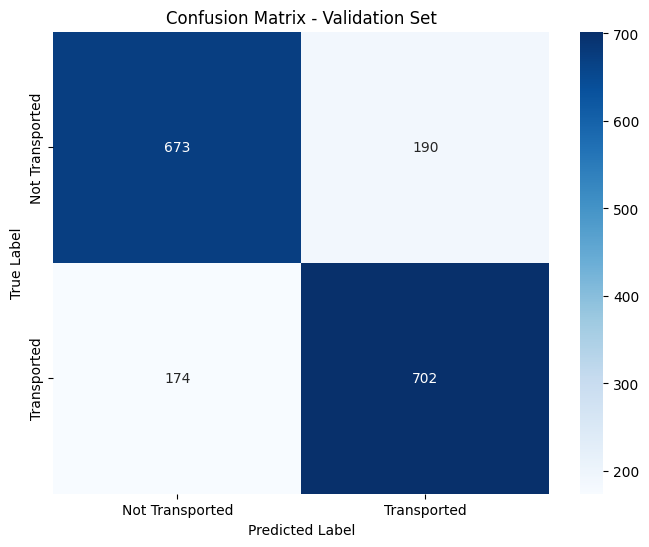

In [165]:
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
plt.title('Confusion Matrix - Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [166]:
X_test_final = test_processed[feature_cols].copy()
test_predictions = model_pipeline.predict(X_test_final)
test_probabilities = model_pipeline.predict_proba(X_test_final)

print(f"\nTest set predictions completed:")
print(f"Predictions shape: {test_predictions.shape}")
print(f"Prediction distribution: {np.bincount(test_predictions)}")

# Create submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'],
    'Transported': test_predictions.astype(bool)  # Convert to boolean as required
})

print(f"\nSubmission preview:")
print(submission.head())
print(f"Submission shape: {submission.shape}")


Test set predictions completed:
Predictions shape: (4277,)
Prediction distribution: [2039 2238]

Submission preview:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
Submission shape: (4277, 2)


In [167]:
submission.to_csv('spaceship_titanic_submission.csv', index=False)
print("Submission saved to 'spaceship_titanic_submission.csv'")

Submission saved to 'spaceship_titanic_submission.csv'
